# Data Science Dashboard Project 
#### Data used: Public Source from Stackoverflow 



## Section 0 - Install and Import Packages 

In [58]:
# # Uncomment nelow lines to install pandas, if they are not already installed. 
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install seaborn
# !pip install scikit-learn

Importing the libraries

In [59]:
#### importing all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Section 1 - Data Load and Exploration

In [60]:
# set this option for enabling copy on write, as recommended for Python 3.0 onwards.  
pd.options.mode.copy_on_write = True
# load the data and display top 2 records to get the sense of data. 
data = pd.read_csv("./data/2024_survey_results_public.csv")
data.head(2)


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


### Data Exploration

##### **Original Data Summary and Problem Statement**
Data Has total 114 features. Out of these one feature I am selecting as Target Variable. The Feature is callec "CompTotal". 

The DS problem formation here is to use this dataset to predict total Compensation of a potential employee, based of important features explored and engineered using this data set. 

In [61]:
# data.info() # This indicate the structure of the data along with Dtype information. Total records, number of columns etc. 
data.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Data columns (total 114 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    ResponseId                      65437 non-null  int64  
 1    MainBranch                      65437 non-null  object 
 2    Age                             65437 non-null  object 
 3    Employment                      65437 non-null  object 
 4    RemoteWork                      54806 non-null  object 
 5    Check                           65437 non-null  object 
 6    CodingActivities                54466 non-null  object 
 7    EdLevel                         60784 non-null  object 
 8    LearnCode                       60488 non-null  object 
 9    LearnCodeOnline                 49237 non-null  object 
 10   TechDoc                         40897 non-null  object 
 11   YearsCode                       59869 non-null  object 
 12   YearsCodePro    

#### Here we can get sense of the Target Variable 

In [62]:
nn_rec = data.CompTotal.isna().sum()
tot_rec = data.CompTotal.shape[0]
if nn_rec < tot_rec:
    print(f"Field has null Values = {tot_rec - nn_rec} out of {tot_rec} ==> Total Not Null Records = {nn_rec}")

Field has null Values = 33740 out of 65437 ==> Total Not Null Records = 31697


##### **Removing those records where does not have any value for Target Variable for current study**
First path of pre-processing is keep all the records which has a Value available in CompTotal. 

##### **Removing features which are not useful**
1. Retaining fields which has less than 50% null values 

2. Removing the colums which has high/low cardinality, like ID columns etc. 
- ResponseId
- Check (which has unique Value)
- Currency (High correlation with Country)
- LanguageWantToWorkWith
- NEWCollabToolsHaveWorkedWith

3. Removing one those are Expectedd to have less impact or are more like Survey Metadata that actual data value --> Based on Domain Knowledge 
- OfficeStackSyncHaveWorkedWith 
- BuyNewTool
- SurveyEase
- SurveyLength
- 'SOAccount',
-  'SOVisitFreq',
- 'SOComm',
- 'SOHow',
- etc. 



In [157]:
#### create copy of original data frame and, 
#### then drop all records where Target variable is empty. 
#### This will give us our final data set for problem consideration.  
data_new=data.copy()
data_new.dropna(inplace=True, subset="CompTotal")
print(f"DF shape for problem consideration = {data_new.shape}")
# removing columns with >50% null values
p=data_new.isna().sum().sort_values()/data_new.shape[0]
col_sel = list(p[p.le(0.5)].index)
# print(len(col_sel))

# Dropping other columns that are not relevant for models. 
drop_cols = ["ResponseId"]
# drop_cols +=["Check","Currency","OfficeStackSyncHaveWorkedWith",'SurveyEase','SurveyLength',"BuyNewTool"]
# drop_cols +=["BuildvsBuy","OpSysProfessional use","OpSysPersonal use"]
# drop_cols +=["LanguageWantToWorkWith","NEWCollabToolsHaveWorkedWith","LanguageHaveWorkedWith"]
# drop_cols +=["ToolsTechHaveWorkedWith","OrgSize"]
# drop_cols +=['SOAccount','SOVisitFreq', 'SOComm', 'SOHow',"NEWSOSites","TechEndorse","PurchaseInfluence","TBranch"]
for col in drop_cols:
    pass
    col_sel.remove(col) 
#### Finally creating the final data set with required feastures which we will use for problem consideration.  
data_final = data_new[col_sel].copy()
print(f"Final DF for Problem consideration = {data_final.shape}")
print(f"DF columns for final Consideration: {list(data_final.columns)}")


DF shape for problem consideration = (33740, 114)
Final DF for Problem consideration = (33740, 104)
DF columns for final Consideration: ['MainBranch', 'Age', 'Employment', 'Check', 'EdLevel', 'Currency', 'Country', 'CompTotal', 'CodingActivities', 'RemoteWork', 'OrgSize', 'DevType', 'LearnCode', 'PurchaseInfluence', 'YearsCode', 'YearsCodePro', 'AISelect', 'NEWSOSites', 'LanguageHaveWorkedWith', 'SOAccount', 'SOVisitFreq', 'SOComm', 'SOHow', 'OpSysPersonal use', 'NEWCollabToolsHaveWorkedWith', 'OfficeStackSyncHaveWorkedWith', 'SurveyEase', 'SurveyLength', 'BuyNewTool', 'TBranch', 'TechEndorse', 'BuildvsBuy', 'LanguageWantToWorkWith', 'OpSysProfessional use', 'ToolsTechHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'OfficeStackAsyncHaveWorkedWith', 'NEWCollabToolsAdmired', 'DatabaseHaveWorkedWith', 'LanguageAdmired', 'LearnCodeOnline', 'OfficeStackSyncWantToWorkWith', 'ToolsTechWantToWorkWith', 'OfficeStackSyncAdmired', 'SOPartFreq', 'WebframeHaveWorkedWith', 'ToolsTechAdmired', 'AISe

#### Further preprocessing final data set after handling: 
- Non compatiable data for YearsCode and YearsCodePro features. 

In [158]:
#### convering lower and upper limits to a numerical values of 1 and 51 respectively. 
#### Apply this on both experience features. 
for nf in ["YearsCode", "YearsCodePro"]:
    data_final.loc[data_final[nf]=="Less than 1 year", nf] = 1
    data_final.loc[data_final[nf]=="More than 50 years", nf] = 51
    data_final[nf] = data_final[nf].astype(float)


data_final.info()


<class 'pandas.core.frame.DataFrame'>
Index: 33740 entries, 72 to 65431
Columns: 104 entries, MainBranch to MiscTechAdmired
dtypes: float64(15), object(89)
memory usage: 27.0+ MB


In [159]:
#### checking for columns that has null values
data_final.isna().sum()
# data_final.head()

MainBranch                       0
Age                              0
Employment                       0
Check                            0
EdLevel                          0
                             ...  
AIToolCurrently Using        13385
PlatformAdmired              14416
MiscTechWantToWorkWith       14463
AIToolInterested in Using    15628
MiscTechAdmired              16337
Length: 104, dtype: int64

In [160]:
data_final[["JobSat","JobSatPoints_10"]].isna().sum()


JobSat             11383
JobSatPoints_10    11261
dtype: int64

**Handling Null values**

- Numeric Field: Replace with Mean()
- Categorical Field: Replace with Median

In [151]:
def impute_data(df, num_features, cat_features): 
    '''
    This is custom function that does imputing for null values. 
    '''
    for nf in num_features:
        df[nf] = df[nf].fillna(df[nf].mean())
    for cf in cat_features:
        df[cf] = df[cf].fillna(df[cf].median)
    print(df.isna().sum())


# split data into numerical and categorical features
num_features = list(data_final.select_dtypes(exclude=['object']).columns)
print('Numerical features:', num_features)
cat_features = list(data_final.select_dtypes(include=['object']).columns)
print('Categorical features:', cat_features)

#### This is taken care by using Preprocessing pipeline at the later stage 
#### after Target/Feature splitting.
#### Hence commented the below line which call the imputeing function here. 
impute_data(data_final, num_features, cat_features)



Numerical features: ['CompTotal', 'YearsCode', 'YearsCodePro', 'ConvertedCompYearly', 'WorkExp', 'JobSatPoints_8', 'JobSatPoints_9', 'JobSatPoints_10', 'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_11', 'JobSatPoints_5', 'JobSatPoints_4', 'JobSatPoints_1', 'JobSat']
Categorical features: ['MainBranch', 'Age', 'Employment', 'Check', 'EdLevel', 'Currency', 'Country', 'CodingActivities', 'RemoteWork', 'OrgSize', 'DevType', 'LearnCode', 'PurchaseInfluence', 'AISelect', 'NEWSOSites', 'LanguageHaveWorkedWith', 'SOAccount', 'SOVisitFreq', 'SOComm', 'SOHow', 'OpSysPersonal use', 'NEWCollabToolsHaveWorkedWith', 'OfficeStackSyncHaveWorkedWith', 'SurveyEase', 'SurveyLength', 'BuyNewTool', 'TBranch', 'TechEndorse', 'BuildvsBuy', 'LanguageWantToWorkWith', 'OpSysProfessional use', 'ToolsTechHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'OfficeStackAsyncHaveWorkedWith', 'NEWCollabToolsAdmired', 'DatabaseHaveWorkedWith', 'LanguageAdmired', 'LearnCodeOnline', 'OfficeStackSyncWantToWorkWith', 'To

Handling Outliers: 
- CompTotal greater than and equal to 1e8 are considered as 1e8
- CompTotal less than or equal to 10000 are capped at 10000

In [152]:
data_new.loc[data_new.CompTotal.ge(1e+8), "CompTotal"] = 1e+8
data_new.loc[data_new.CompTotal.le(10000), "CompTotal"] = 10000
# data_new.CompTotal[data_new.CompTotal.le(1e+9)].value_counts().sort_index()
data_new.CompTotal.value_counts().sort_index()


CompTotal
10000.0        1065
10200.0           5
10300.0           1
10336.0           1
10400.0           1
               ... 
91000000.0        1
93600000.0        1
96000000.0        7
98000000.0        1
100000000.0     363
Name: count, Length: 2922, dtype: int64

## Section 2: Data Analysis and Exploration

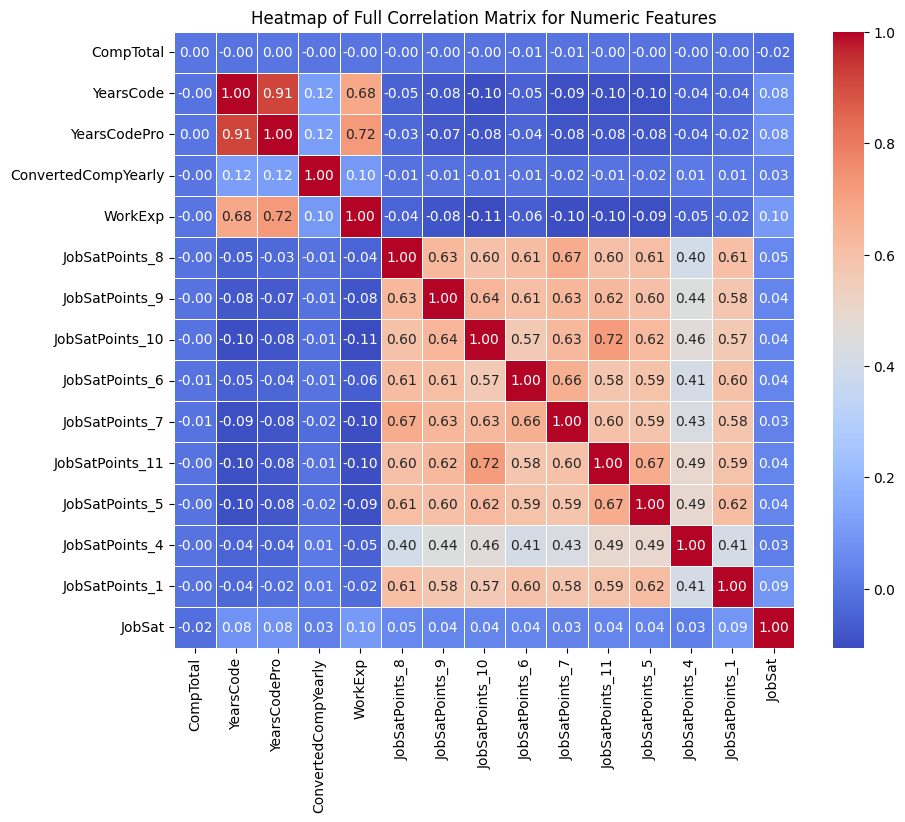

In [153]:
correlation_matrix = data_final.select_dtypes(include=np.number).corr()
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap of Full Correlation Matrix for Numeric Features')
plt.show()

#### Correlation Summary:
1. There is high correlation between YearsCode and YearsCodePro: This makes sense as the two features are differring by only the Academic Years Coding Experience. 
2. Various JobSat Points has good mutual correlation, as they are covering same sentiments. 
3. JobSat is having low positive correlation with almost all other fields. 
4. Another good positive correlation is found there between WorkExp and YearsCode, YearsCodePro. Again this is logically understandable.
5. The CompTotal feature, did not show any corretaion with any of the Numeric Fields. This will limit our capability of getting a good model training for predicting Comp Total, hence I am limiting the project to Data Exploration and insights here. No Model training and prediction is going to be done here.  

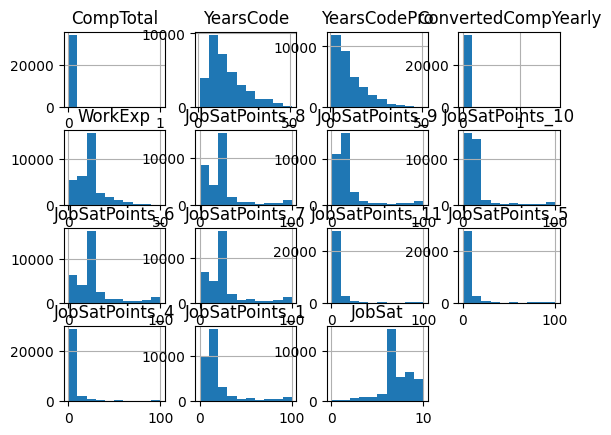

In [154]:
data_final.hist()
print()

#### Histogram Analysis
1. CompTotal is highly left skewed and does not indicate any visible relation with other numeric fields. 
2. WorkExp, YearsCOde and YearsCodePro are following more or less similar distribution that also explains their high mutual correlation as well. 
3. All JobSatPoints features are also having similar kind of distribution and hence good mutual correlation. 
4.  JobSat distribution is opposite of all JobSatPoints. This may be because many datapoints has null values for these fields. 

## Section 2: Model training and finetuning 

##### Targe and Features separation. 
This completes the data cleanup tasks for use in Model Training and Validations. 


In [136]:
# X=data_final.drop(columns=["CompTotal"], axis=1)
# # X=data_final[["YearsCode","Age","EdLevel"]].copy()

# print(X.shape, X.columns)
# y=data_final["CompTotal"].copy()
# print(y.shape)

In [116]:
# fetching  numerical and categorical features
num_features = list(X.select_dtypes(exclude=['object']).columns)
print('Numerical features:', num_features)
cat_features = list(X.select_dtypes(include=['object']).columns)
print('Categorical features:', cat_features)

Numerical features: ['YearsCode']
Categorical features: ['Age', 'EdLevel']


#### Creating Preprocessing pipeline
- Num Pipeline
    - Simple imputer (mean as strategy)
    - Scalling (MinMax Scaler)
- Cat Pipeline  
    - Simple Imputer (most_frequent strategy)
    - Ordinal Encoder 
    -


In [117]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


num_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="mean")),
        ("scaler", MinMaxScaler())
    ])

cat_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        # ("ordinal_encoder", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)),    
        ("cat_encoder", OneHotEncoder(sparse_output=False, handle_unknown="ignore")),
    ])


preprocessing = ColumnTransformer([
        ("num", num_pipeline, num_features),
        ("cat", cat_pipeline, cat_features),
    ])

X_transformed = pd.DataFrame(preprocessing.fit_transform(X), 
                         columns=preprocessing.get_feature_names_out(),
                         index=X.index)
print(X_transformed.shape)


(33740, 17)


In [118]:
from sklearn.model_selection import train_test_split

#### Train and Test Split of the data
X_train, X_test, y_train, y_test = train_test_split(
    X_transformed, y,
    test_size=0.25,    # or train_size=0.75
    random_state=42,  # for reproducibility
    shuffle=True,     # default is True
    stratify=None     # for classification tasks to maintain class proportions
)
shape_X, shape_y = X_transformed.shape, y.shape
shape_X_train, shape_y_train = X_train.shape,  y_train.shape
shape_X_test,shape_y_test = X_test.shape, y_test.shape


print(f"{shape_X} {shape_y} \n\t\
      ==> Train ({shape_X_train[0]/shape_X[0]*100}%) = {shape_X_train} {shape_y_train}\n\t\
        ==> Test({shape_X_test[0]/shape_X[0]*100}%) =  {shape_X_test} {shape_y_test}")

(33740, 17) (33740,) 
	      ==> Train (75.0%) = (25305, 17) (25305,)
	        ==> Test(25.0%) =  (8435, 17) (8435,)


In [124]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error

LR = LinearRegression()
LR.fit(X_train,y_train)
print("Train Score:",LR.score(X_train,y_train))
print("Test Score:",LR.score(X_test,y_test))
y_pred_train = LR.predict(X_train)
print(type(y_pred_train))
print(y_train[:4])
print(y_pred_train[:4])
y_pred_test = LR.predict(X_test)
# accuracy_score(y_true=y_test, y_pred=y_pred)
mse_train = mean_squared_error(y_train.values,y_pred_train)
print(f"MSE Train:{mse_train:.2f}")
mse_test = mean_squared_error(y_true=y_test.values,y_pred=y_pred_test)
print(f"MSE Test:{mse_test:.2f}")

Train Score: 0.00010280884248092814
Test Score: -4.653828210308296e+189
<class 'numpy.ndarray'>
808       63000.0
40264     60000.0
59135    275000.0
51259     50000.0
Name: CompTotal, dtype: float64
[2.59581616e+145 3.94139552e+145 9.32033500e+145 9.93432639e+145]
MSE Train:39512257551411408844143651787011999131384077428071772587230028980781891034623928476319866559174089860824098273884713663743863719961828591305782601873141086041076910167313934955270454655894265116636366601413419466127183001435397027265269046358663488185194881981144390199205561725875305445687558144.00
MSE Test:5516628905759714746563172034464520511714278419157132330379140197427235966893244311941424019990206049892209531944834665959311579637100081719753622737937797741150833343317437885488311248519751518045628014445281301105355045404965244425050481446619526156597833498413425912085616414842895305015296.00
